# Pair Programming Estadística III

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísticas de los contenidos del conjunto de datos.

Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

## Objetivos

Los objetivos de hoy son:

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("datos/sephora_website_dataset.csv")
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


### 1. Extraer los siguentes estadísticos del conjunto de datos para varias de las varibles disponibles:

- Tabla de contingencia

In [38]:
df_crosstab = pd.crosstab(df["MarketingFlags"], df["MarketingFlags_content"])
df_crosstab.head()

MarketingFlags_content,0,exclusive,exclusive · online only,limited edition,limited edition · exclusive,limited edition · exclusive · online only,limited edition · online only,limited time offer,limited time offer · limited edition · exclusive,online only
MarketingFlags,,,,,,,,,,
False,4786,0,0,0,0,0,0,0,0,0
True,0,1692,318,237,297,119,188,2,1,1528


Lo que se observa es que si el producto está activo para la venta en la web (True) tiene un formato de exclusividad y si no el producto se queda en standby y no tiene ningún formato.

- Coeficiente de correlación de las variables numéricas del dataset.

In [8]:
matriz_correlacion = df.corr()
matriz_correlacion

/tmp/ipykernel_450/2926037190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
id,1.000000,-0.176684,-0.175482,-0.104208,-0.026661,-0.004168,0.283722,0.153745,0.199285,0.200357,-0.008607
rating,-0.176684,1.000000,0.081478,0.094788,0.019559,0.001941,-0.108410,-0.123342,-0.001908,-0.130471,0.006164
number_of_reviews,-0.175482,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.096984,-0.137082,0.003799,-0.066661,0.000742
love,-0.104208,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.057228,-0.138933,0.050957,-0.046750,-0.002879
price,-0.026661,0.019559,-0.084001,-0.088724,1.000000,0.983357,-0.056920,0.117250,-0.178809,0.015333,-0.009679
value_price,-0.004168,0.001941,-0.088855,-0.091140,0.983357,1.000000,-0.028660,0.130658,-0.159005,0.079754,-0.009874
MarketingFlags,0.283722,-0.108410,-0.096984,-0.057228,-0.056920,-0.028660,1.000000,0.578973,0.627080,0.332344,0.018908
online_only,0.153745,-0.123342,-0.137082,-0.138933,0.117250,0.130658,0.578973,1.000000,-0.077543,0.097353,-0.010023
exclusive,0.199285,-0.001908,0.003799,0.050957,-0.178809,-0.159005,0.627080,-0.077543,1.000000,0.166162,0.002814
limited_edition,0.200357,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.332344,0.097353,0.166162,1.000000,0.015129


/tmp/ipykernel_450/4083299560.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "Oranges", annot = True, vmin = -1, vmax = 1)


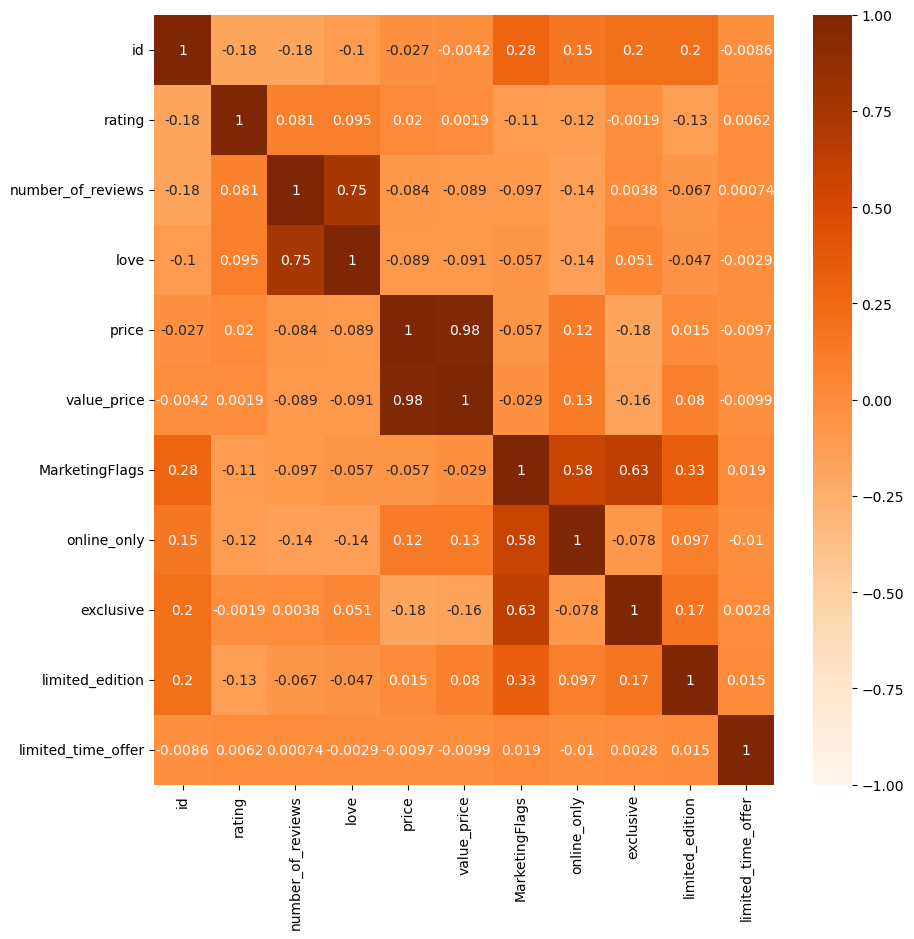

In [23]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(), cmap = "Oranges", annot = True, vmin = -1, vmax = 1)

plt.show();

Según observamos en el gráfico tenemos poca correlación lineal entre las variables, los valores son próximos a 0.
Lo que si se observa es que hay una correlación más alta entre el número de reviwes y la satisfacción del cliente.

- Sesgos de alguna de las variables numéricas del dataset.

<Figure size 2000x2000 with 0 Axes>

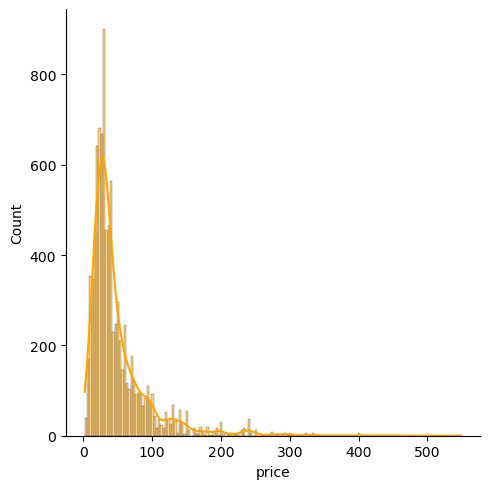

In [40]:
plt.figure(figsize = (20,20))

sns.displot(df["price"], color = "orange", kde = True)

plt.show();

Lo que se puede deducir es que el precio al que más se vende un producto es sobre los 30 euros (aunque en el gráfico no se puede observar el valor exacto) ya que el precio de oscilación de venta es entre 0-80 euros por producto.

- Intervalo de confianza de algunas de las variables numéricas del dataset

In [32]:
datos_precio = df["price"]

# consideramos el intervalo de confianza del 95% 
print("Intervalo de confianza de precio", st.t.interval(alpha = 0.95, df = len(datos_precio)-1, loc = np.mean(datos_precio), scale = st.sem(datos_precio)))

print("Mediana de precio", np.mean(datos_precio))

Intervalo de confianza de precio (49.09765821224324, 51.028816482346635)
Mediana de precio 50.06323734729494


In [33]:
datos_rating = df["rating"]

# consideramos el intervalo de confianza del 95% 
print("Intervalo de confianza de precio", st.t.interval(alpha = 0.95, df = len(datos_rating)-1, loc = np.mean(datos_rating), scale = st.sem(datos_rating)))

print("Mediana de precio", np.mean(datos_rating))

Intervalo de confianza de precio (3.9693894910517256, 4.010649775963981)
Mediana de precio 3.9900196335078535


- Basándonos en un intervalo de confianza del 95%, comparándolo con la mediana, al estar dentro de dicho intervalo es un rango muy confiable.

### 2. Interpretación de los resultados.

Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Happy coding 📊📈📉